**A Predictive Model By Implementing Multiple Classification On A Liver Patient Dataset To Predict Liver Disease**

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
from scipy import stats as st

In [56]:
df = pd.read_csv("Dataset-620.csv", sep=';')       #Dataset was semicolon-separated

In [57]:
df

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82
613,cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71


In [58]:
#Chekcing number of Rows & Columns
df.shape       

(615, 13)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   category                     615 non-null    object 
 1   age                          615 non-null    int64  
 2   sex                          615 non-null    object 
 3   albumin                      614 non-null    float64
 4   alkaline_phosphatase         597 non-null    float64
 5   alanine_aminotransferase     614 non-null    float64
 6   aspartate_aminotransferase   615 non-null    float64
 7   bilirubin                    615 non-null    float64
 8   cholinesterase               615 non-null    float64
 9   cholesterol                  605 non-null    float64
 10  creatinina                   615 non-null    float64
 11  gamma_glutamyl_transferase   615 non-null    float64
 12  protein                      615 non-null    object 
dtypes: float64(9), int64

In [60]:
df.columns

Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase ', 'protein   '],
      dtype='object')

In [61]:
# Remove extra spaces and convert to lowercase - (protein have extra spaces)
df.columns = df.columns.str.strip().str.lower()

df.columns

Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase', 'protein'],
      dtype='object')

In [62]:
# Numerical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['age', 'albumin', 'alkaline_phosphatase', 'alanine_aminotransferase',
       'aspartate_aminotransferase', 'bilirubin', 'cholinesterase',
       'cholesterol', 'creatinina', 'gamma_glutamyl_transferase'],
      dtype='object')

In [63]:
# Categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['category', 'sex', 'protein'], dtype='object')

In [64]:
#protein must be Numerical
df['protein'].dtype            

dtype('O')

In [65]:
#checking bad values
df['protein'].unique()[:20]

array(['69', '76.5', '79.3', '75.7', '68.7', '74', '74.5', '67.1', '71.3',
       '69.9', '75.4', '68.6', '70.4', '71.9', '72.7', '72.4', '69.3',
       '68.1', '74.3', '69.1'], dtype=object)

In [66]:
#Convert Dtype Obj to Numeric
df['protein'] = pd.to_numeric(df['protein'], errors='coerce')

In [67]:
df['protein'].dtype

dtype('float64')

In [68]:
# Re-checking Numerical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['age', 'albumin', 'alkaline_phosphatase', 'alanine_aminotransferase',
       'aspartate_aminotransferase', 'bilirubin', 'cholinesterase',
       'cholesterol', 'creatinina', 'gamma_glutamyl_transferase', 'protein'],
      dtype='object')

In [69]:
# Re-checking Categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['category', 'sex'], dtype='object')

In [70]:
# Check unique classes in target variable
df['category'].unique()

array([' no_disease', 'suspect_disease', ' hepatitis', ' fibrosis',
       ' cirrhosis'], dtype=object)

In [71]:
# Count of each class
df['category'].value_counts()

category
 no_disease        533
 cirrhosis          30
 hepatitis          24
 fibrosis           21
suspect_disease      7
Name: count, dtype: int64

In [72]:
#Target Variable or 'diagnosis' depending on dataset
target_col = 'category'   

In [73]:
df[target_col].unique()

array([' no_disease', 'suspect_disease', ' hepatitis', ' fibrosis',
       ' cirrhosis'], dtype=object)

In [74]:
df['albumin'].apply(lambda x: x > 54)

0      False
1      False
2      False
3      False
4      False
       ...  
610    False
611    False
612    False
613    False
614    False
Name: albumin, Length: 615, dtype: bool

In [75]:
#Check Missing Values
df.isnull().sum()

category                       0
age                            0
sex                            0
albumin                        1
alkaline_phosphatase          18
alanine_aminotransferase       1
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                   10
creatinina                     0
gamma_glutamyl_transferase     0
protein                        1
dtype: int64

In [76]:
#Check Missing Values in Percentage
(df.isnull().sum() / len(df)) * 100

category                      0.000000
age                           0.000000
sex                           0.000000
albumin                       0.162602
alkaline_phosphatase          2.926829
alanine_aminotransferase      0.162602
aspartate_aminotransferase    0.000000
bilirubin                     0.000000
cholinesterase                0.000000
cholesterol                   1.626016
creatinina                    0.000000
gamma_glutamyl_transferase    0.000000
protein                       0.162602
dtype: float64

**Final Dataset Preview (After Cleaning)**

In [79]:
df.head()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [80]:
df.tail()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
610,cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


**Fill the Null values by their Median**

In [82]:
# handling Null values:

cols = [
    'albumin',
    'alkaline_phosphatase',
    'alanine_aminotransferase',
    'cholesterol',
    'protein'
]

df[cols] = df[cols].fillna(df[cols].median())
df.isnull().sum()

category                      0
age                           0
sex                           0
albumin                       0
alkaline_phosphatase          0
alanine_aminotransferase      0
aspartate_aminotransferase    0
bilirubin                     0
cholinesterase                0
cholesterol                   0
creatinina                    0
gamma_glutamyl_transferase    0
protein                       0
dtype: int64

### Above we handled missing values using Median of that perticular column. We choose MEDIAN because it is Robust to outliers, Works well for skewed data, Preserves typical values and Avoids distortion caused by extreme values.

In [84]:
#Basic Statistical Summary
df.describe()

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.620732,68.222927,28.441951,34.786341,11.396748,8.196634,5.366992,81.287805,39.533171,72.044390
std,10.055105,5.775935,25.646364,25.449889,33.090690,19.673150,2.205657,1.123499,49.756166,54.661071,5.398238
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


### Basic Statistical Summary

Count: All variables have 615 observations, indicating no missing values.

Central Tendency: Mean and median values are close for age, albumin, cholesterol, suggesting fairly symmetric distributions.

Spread: Standard deviation is high for liver-related enzymes (ALP, ALT, AST, GGT), showing large variability.

Range: Several features have a wide range (e.g., bilirubin, creatinina, GGT), indicating extreme values.

Skewness Indicator: Large gaps between mean and max suggest right-skewed distributions and presence of outliers in biochemical markers.

# Outlier Detection using IQR Method

In [87]:
# Outlier Detection:
outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = outliers.shape[0]

outlier_summary  # This will Give number of outliers per feature


{'age': 1,
 'albumin': 27,
 'alkaline_phosphatase': 14,
 'alanine_aminotransferase': 36,
 'aspartate_aminotransferase': 64,
 'bilirubin': 47,
 'cholinesterase': 24,
 'cholesterol': 12,
 'creatinina': 12,
 'gamma_glutamyl_transferase': 65,
 'protein': 20}

### We will also use Boxplot to Visualize Outliers

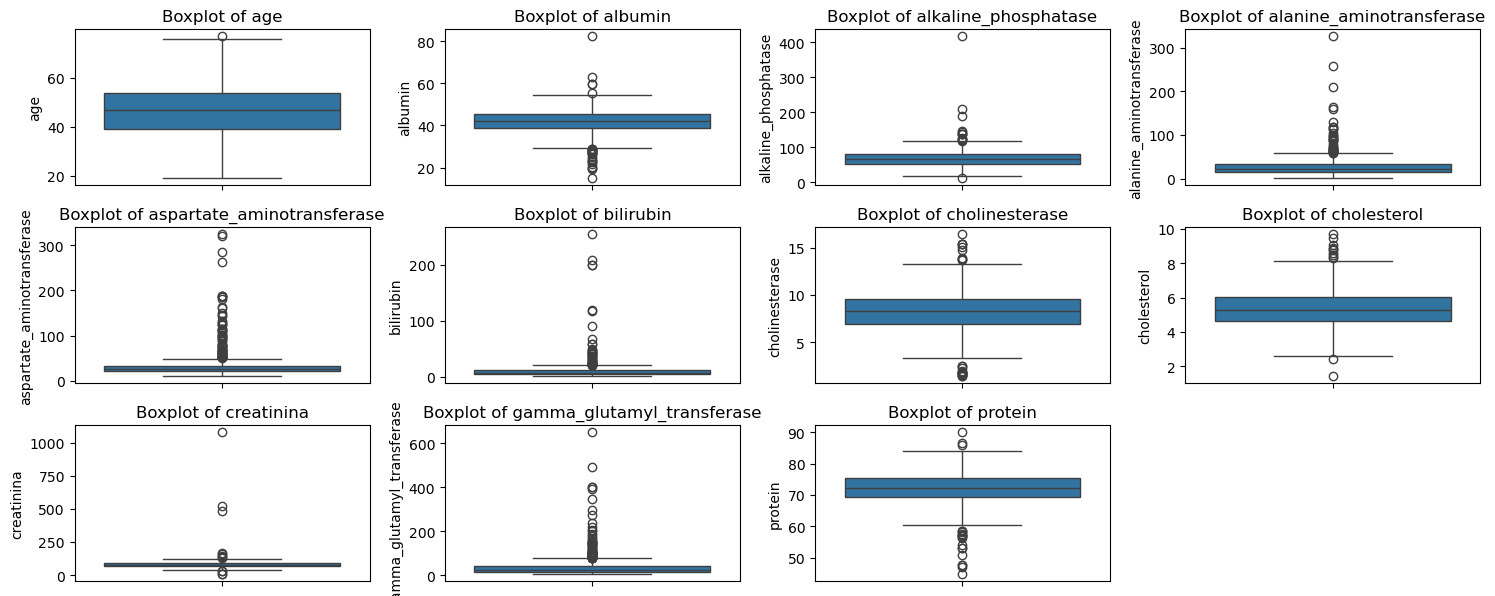

In [89]:

plt.figure(figsize=(15, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


Boxplot Summary:

The boxplots reveal the presence of outliers in several numerical features, particularly liver enzyme variables such as alanine aminotransferase (ALT), aspartate aminotransferase (AST), alkaline phosphatase, bilirubin, gamma-glutamyl transferase, and creatinina. These features show strong right-skewness with multiple extreme values, which are expected in medical data and likely represent severe disease conditions rather than errors.

Features like age, albumin, cholesterol, cholinesterase, and protein show fewer and less extreme outliers, indicating more stable distributions. Overall, the detected outliers were treated as clinically meaningful values and handled using capping instead of removal to preserve important disease information.

# Outlier Handling using Capping Method

In [92]:
# Outlier Handling:

for col in num_cols:
    Q1 = df[col].quantile(0.01)
    Q3 = df[col].quantile(0.99)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


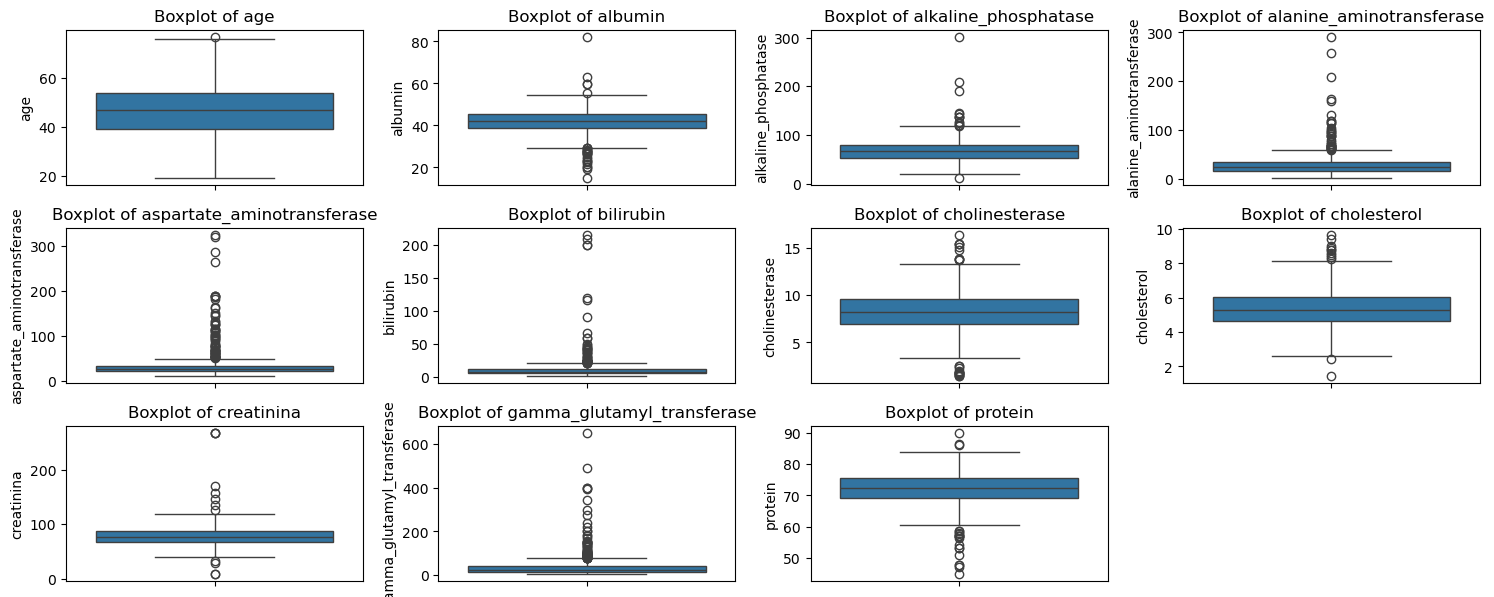

In [93]:
# After Handling the outliers plotting Boxplot to verify: 
plt.figure(figsize=(15, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

### From above we can see all the Outliers have been Handled

# Histogram for Numerical Columns

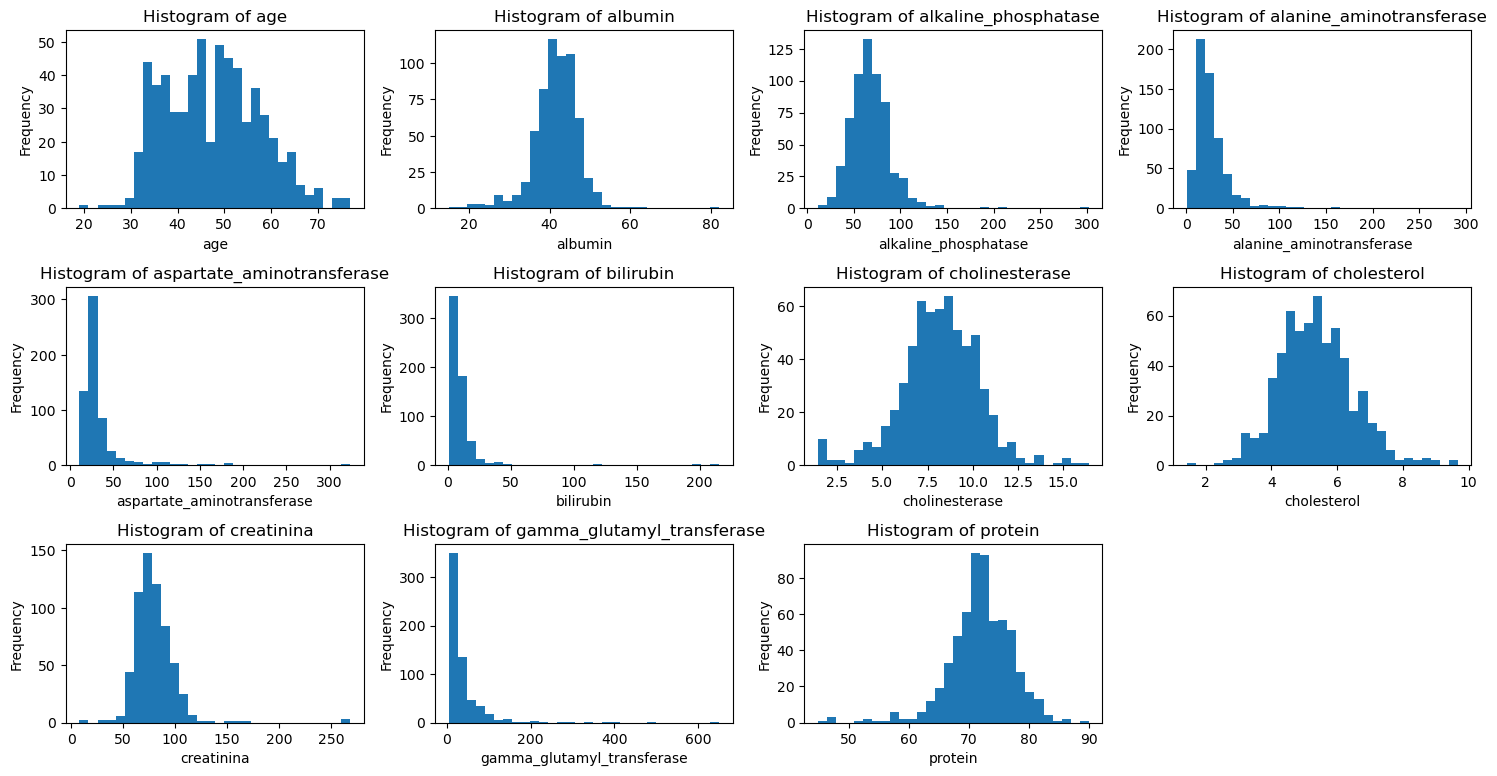

In [96]:
# Plotting Histogram:

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    plt.hist(df[col], bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# KDE Plots for Numerical Columns

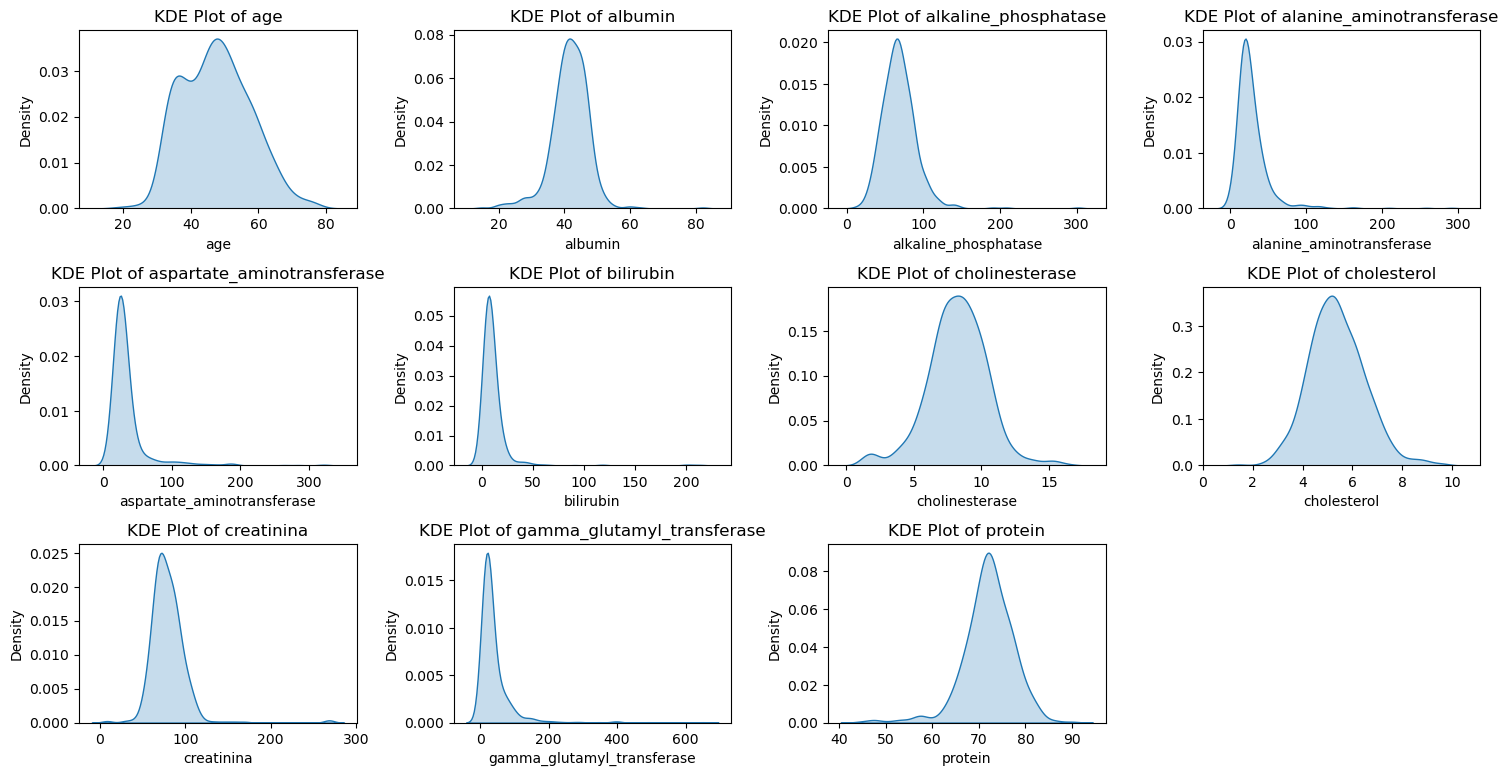

In [98]:
# KDE Plots:

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.kdeplot(df[col], fill=True)
    plt.title(f"KDE Plot of {col}")

plt.tight_layout()
plt.show()


# Conclusion: Histogram & KDE Analysis

Histograms and KDE plots show that most numerical features are non-normally distributed and exhibit right skewness, especially liver enzymes such as ALT, AST, alkaline phosphatase, bilirubin, and GGT. Several features contain long tails and multiple peaks, indicating variability across disease severity levels. Features like albumin, protein, cholesterol, and age display more stable, near-bell-shaped distributions (Normal Distribution). Overall, these plots confirm the presence of skewness and non-linear patterns in Numerical Columns, supporting the use of robust preprocessing and non-linear models for classification.

# Count Plots for Categorical Columns

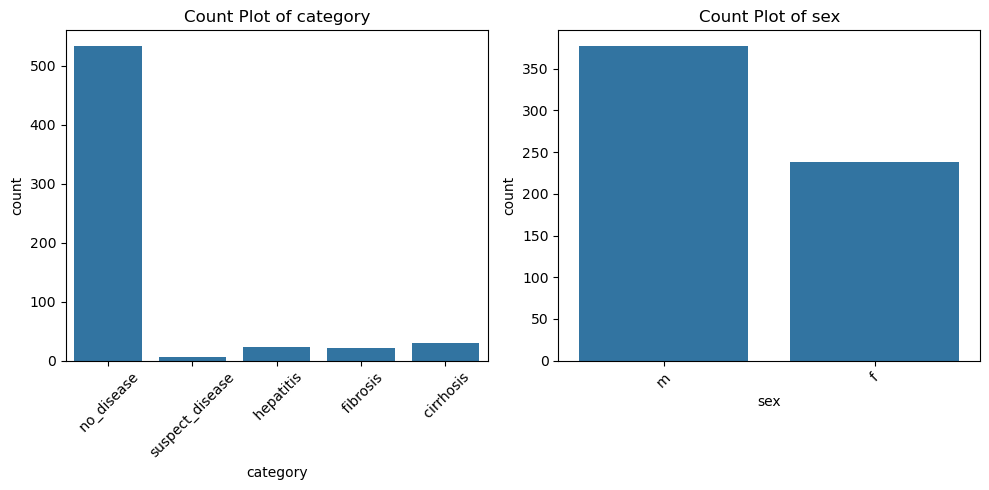

In [101]:
# Count Plots:

plt.figure(figsize=(10, 5))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, len(cat_cols), i)
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Conclusion:

We Observe that the Target Column (category) is highly imbalanced. Due to this:

The model will be biased toward the majority class (no_disease)

Minority classes (cirrhosis, fibrosis, hepatitis, suspect_disease) will have poor recall and F1-score

overall accuracy can be misleading

The model may fail to detect actual disease cases (false negatives increase)

# Data Quality & Univariate Analysis

The dataset shows minimal missing  values, which were identified and handled appropriately. Statistical summaries and distribution plots revealed skewed distributions and outliers in several numerical features, especially liver enzyme variables, reflecting real medical variations which were Treated using capping method. Count plots highlighted significant class imbalance in categorical features. Overall, this analysis helped understand individual feature behavior and guided preprocessing and model selection decisions.

In [104]:
df

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32.0,m,38.5,52.500,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,no_disease,32.0,m,38.5,70.300,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32.0,m,46.9,74.700,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32.0,m,43.2,52.000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32.0,m,39.2,74.100,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,cirrhosis,62.0,f,32.0,301.903,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,cirrhosis,64.0,f,24.0,102.800,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,cirrhosis,64.0,f,29.0,87.300,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,cirrhosis,46.0,f,33.0,66.200,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


# Working with Multicolinearity Problem

Multicollinearity

Happens when one feature is highly correlated with multiple other features

Not just pairwise, but combined effect

Common in medical & lab datasets

In [106]:
df['sex'] = df['sex'].map({'m': 1, 'f': 0})
# here i used map fuction because get dummies method will create extra column.

In [107]:
df

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32.0,1,38.5,52.500,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,no_disease,32.0,1,38.5,70.300,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32.0,1,46.9,74.700,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32.0,1,43.2,52.000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32.0,1,39.2,74.100,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,cirrhosis,62.0,0,32.0,301.903,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,cirrhosis,64.0,0,24.0,102.800,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,cirrhosis,64.0,0,29.0,87.300,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,cirrhosis,46.0,0,33.0,66.200,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


here :
no relation=0
relation=1
 for model building we dont want both hence we have to understand the correlation.
 >0.7 has highly considered as correlated

Multicolinearity detection using vif Factor cuz i want proper result.

here protein  182.906046 , albumin  120.221371 these columns has high vif hence these are less important as well as less effect on target column.

In [112]:
df['category'].unique()


array([' no_disease', 'suspect_disease', ' hepatitis', ' fibrosis',
       ' cirrhosis'], dtype=object)

In [113]:
df['category'] = df['category'].str.strip().str.lower()


In [114]:
df['category'].value_counts()


category
no_disease         533
cirrhosis           30
hepatitis           24
fibrosis            21
suspect_disease      7
Name: count, dtype: int64

In [115]:
df['stage1_label'] = (df['category'] != 'no_disease').astype(int)

df['stage1_label'].value_counts()


stage1_label
0    533
1     82
Name: count, dtype: int64

In [116]:
X1 = df.drop(columns=['category', 'stage1_label'])
y1 = df['stage1_label']


In [117]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1,
    test_size=0.2,
    random_state=42,
    stratify=y1
)


In [118]:
from sklearn.ensemble import GradientBoostingClassifier

gb_stage1 = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_stage1.fit(X1_train, y1_train)


GradientBoostingClassifier(learning_rate=0.05, n_estimators=300,
                           random_state=42)

In [119]:
from sklearn.metrics import accuracy_score, classification_report

y1_pred = gb_stage1.predict(X1_test)

print("🔹 Stage-1 Accuracy (GB):")
print(accuracy_score(y1_test, y1_pred))

print("\n🔹 Stage-1 Classification Report (GB):")
print(classification_report(
    y1_test,
    y1_pred,
    target_names=['No Disease', 'Disease']
))


🔹 Stage-1 Accuracy (GB):
0.983739837398374

🔹 Stage-1 Classification Report (GB):
              precision    recall  f1-score   support

  No Disease       0.98      1.00      0.99       107
     Disease       1.00      0.88      0.93        16

    accuracy                           0.98       123
   macro avg       0.99      0.94      0.96       123
weighted avg       0.98      0.98      0.98       123



In [120]:
import pickle

pickle.dump(gb_stage1, open("gb_stage1_model.pkl", "wb"))


In [121]:
df_stage2 = df[df['category'] != 'no_disease'].copy()

df_stage2['category'].value_counts()


category
cirrhosis          30
hepatitis          24
fibrosis           21
suspect_disease     7
Name: count, dtype: int64

In [122]:
from sklearn.preprocessing import LabelEncoder

le2 = LabelEncoder()
y2 = le2.fit_transform(df_stage2['category'])

X2 = df_stage2.drop(columns=['category', 'stage1_label'])


In [123]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2,
    test_size=0.2,
    random_state=42,
    stratify=y2
)


In [124]:
gb_stage2 = GradientBoostingClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_stage2.fit(X2_train, y2_train)


GradientBoostingClassifier(learning_rate=0.05, n_estimators=400,
                           random_state=42)

In [125]:
y2_pred = gb_stage2.predict(X2_test)

print("🔹 Stage-2 Accuracy (GB):")
print(accuracy_score(y2_test, y2_pred))

print("\n🔹 Stage-2 Classification Report (GB):")
print(classification_report(
    y2_test,
    y2_pred,
    target_names=le2.classes_
))


🔹 Stage-2 Accuracy (GB):
0.5294117647058824

🔹 Stage-2 Classification Report (GB):
                 precision    recall  f1-score   support

      cirrhosis       0.57      0.67      0.62         6
       fibrosis       0.40      0.50      0.44         4
      hepatitis       0.50      0.40      0.44         5
suspect_disease       1.00      0.50      0.67         2

       accuracy                           0.53        17
      macro avg       0.62      0.52      0.54        17
   weighted avg       0.56      0.53      0.53        17



In [126]:
pickle.dump(gb_stage2, open("gb_stage2_model.pkl", "wb"))
pickle.dump(le2, open("gb_stage2_encoder.pkl", "wb"))
